<a href="https://colab.research.google.com/github/2303a52351-Saniya/Generative-AI-2025/blob/main/gen_ai_7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

7.1

 (1 ponto) Design a multilayer ANN architecture according to the requirements shown below.
Train, test, save (.h5) and deploy the model to diagnose diabatic disease using the Keras deep
learning library
2. (1 ponto) Calculate training and testing accuracy, build confusion matrix, also calculate recall,
precision and F1-score.
3. (1 ponto) Build the application by loading the saved ANN model.
Tabela 1: ANN Architecture
Layer Neurons Activation Function
Hidden Layer - 1 8 relu
Hidden Layer - 2 16 relu
Hidden Layer - 3 20 relu
Hidden Layer - 4 10 relu
Tabela 2: Training Parameters
epochs batch size error metric Optimizer
150 64 accuracy adadelta
Dataset: https://drive.google.com/file/d/1AcdENlVm5dccNyo_vgdMbneX8YVvH5R3/view?
usp=drive_link


Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.6442 - loss: 0.6845 - val_accuracy: 0.6494 - val_loss: 0.6879
Epoch 2/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6395 - loss: 0.6845 - val_accuracy: 0.6494 - val_loss: 0.6878
Epoch 3/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6438 - loss: 0.6799 - val_accuracy: 0.6494 - val_loss: 0.6878
Epoch 4/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6453 - loss: 0.6822 - val_accuracy: 0.6494 - val_loss: 0.6878
Epoch 5/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6483 - loss: 0.6844 - val_accuracy: 0.6494 - val_loss: 0.6878
Epoch 6/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6217 - loss: 0.6907 - val_accuracy: 0.6494 - val_loss: 0.6878
Epoch 7/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6277 - loss: 0.6831 - val_accuracy: 0.6494 - val_loss: 0.6878
Epoch 8/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6047 - loss: 0.6894 - val_accuracy: 0.6494 - val_loss:

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Accuracy: 0.6104
Precision: 0.5000
Recall: 0.0667
F1 Score: 0.1176
Confusion Matrix:
[[45  2]
 [28  2]]


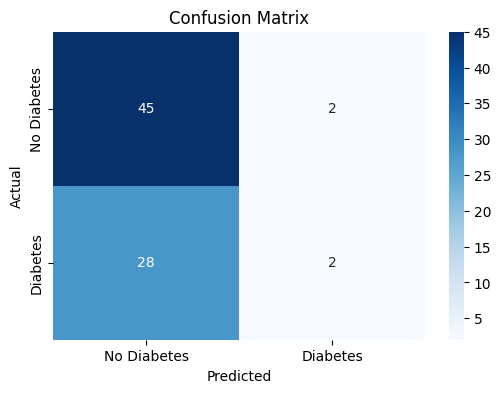

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adadelta
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/diabetes.csv')

x = data.drop('Outcome', axis=1)
y = data['Outcome']

x_train, x_test1, y_train, y_test1 = train_test_split(x, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test1, y_test1, test_size=0.5, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_val_scaled = scaler.transform(x_val)

def diabetes_prediction_model(shape):
    model = Sequential()
    model.add(Dense(8, activation='relu', input_shape=(shape,)))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

diabetes_model = diabetes_prediction_model(x_train.shape[1])

diabetes_model.compile(optimizer=Adadelta(), loss='binary_crossentropy', metrics=['accuracy'])

history = diabetes_model.fit(x_train_scaled, y_train, validation_data=(x_val_scaled, y_val), epochs=150, batch_size=64)

diabetes_model.save('diabetes_model.h5')

loaded_model = load_model('diabetes_model.h5')

y_pred = (loaded_model.predict(x_test_scaled) > 0.5).astype('int')
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()